## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [2]:

from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<AxesSubplot:>

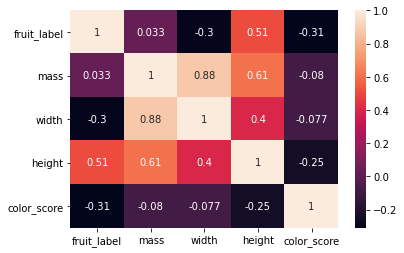

In [5]:
sns.heatmap(fruits.corr(),annot=True)

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

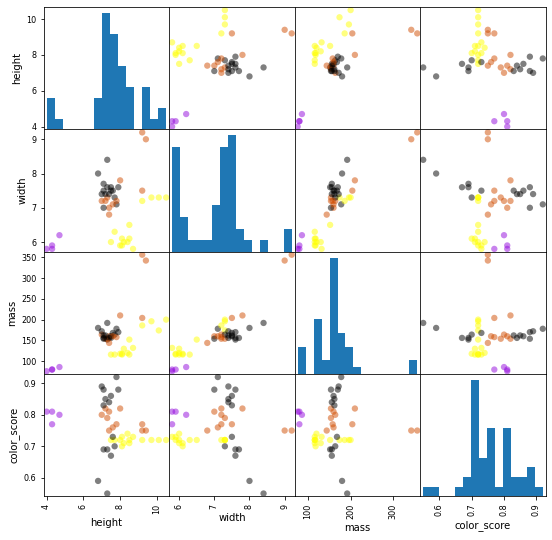

In [6]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

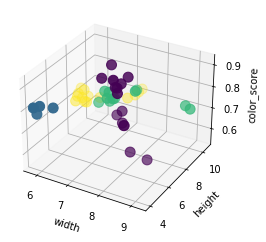

In [7]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [8]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[[ 'mass','width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [9]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [12]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[ 20.,4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [13]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[102, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [14]:
%run C:/Users/nikhil/Documents/GitHub/jupyter/jupyter_import.ipynb

In [15]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


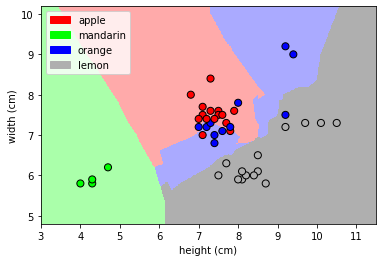

In [16]:

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

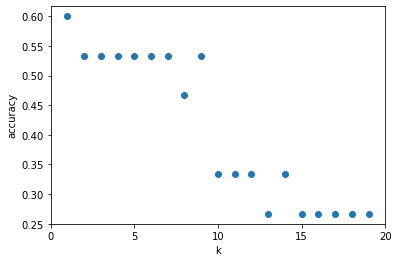

In [17]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

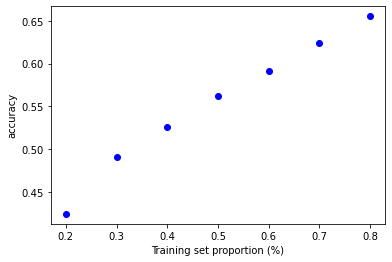

In [18]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 3)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### improve the model


In [19]:

# 1.  intercorrelation mass and width remove the mass  feature 
# 2.  choose test_size=0.2

In [20]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

knn.score(X_test, y_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [37]:
y_pred=knn.predict(X_test)

In [39]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[1, 0, 3, 0],
       [0, 1, 0, 0],
       [2, 0, 3, 0],
       [0, 0, 0, 2]], dtype=int64)

<AxesSubplot:>

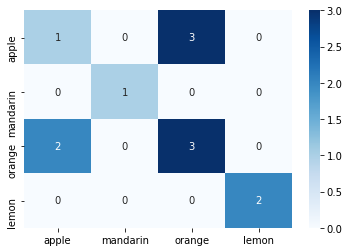

In [40]:
plt.figure()
sns.heatmap(cf_matrix, annot=True,xticklabels=list(lookup_fruit_name.values()),
            yticklabels=list(lookup_fruit_name.values()),
            cmap='Blues')

In [41]:
from sklearn.metrics import classification_report

In [44]:

x=classification_report(y_test,y_pred, target_names=lookup_fruit_name.values(),output_dict=True)

In [45]:
print(classification_report(y_test,y_pred, target_names=lookup_fruit_name.values()))

              precision    recall  f1-score   support

       apple       0.33      0.25      0.29         4
    mandarin       1.00      1.00      1.00         1
      orange       0.50      0.60      0.55         5
       lemon       1.00      1.00      1.00         2

    accuracy                           0.58        12
   macro avg       0.71      0.71      0.71        12
weighted avg       0.57      0.58      0.57        12



In [46]:
df =round(pd.DataFrame(x).transpose(),2)

In [47]:
df

,precision,recall,f1-score,support
apple,0.33,0.25,0.29,4.00
mandarin,1.00,1.00,1.00,1.00
orange,0.50,0.60,0.55,5.00
lemon,1.00,1.00,1.00,2.00
accuracy,0.58,0.58,0.58,0.58
macro avg,0.71,0.71,0.71,12.00
weighted avg,0.57,0.58,0.57,12.00


<b> <h2>line chart for the Accuracy </h2> </b>

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

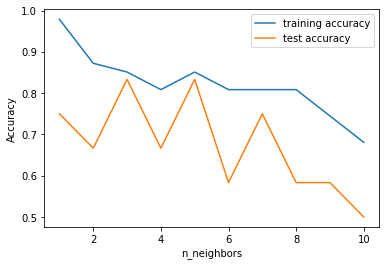

In [49]:

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

In [50]:
import random

In [51]:
test_size= np.arange(0.1,0.9,0.05)
test_size

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85])

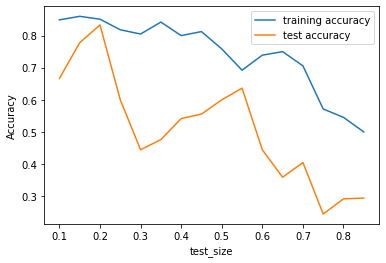

In [52]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= np.arange(0.1, 0.9,0.05)
for i in test_size:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i,random_state=6)
        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train,y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test,y_test))
        
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()